## Experiment 6

### Part 1 Determine the ambient temperature kinetics 

In [28]:
from __future__ import division
import numpy as np
import pandas
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
% matplotlib inline

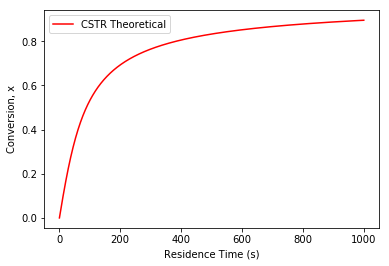

In [58]:
V = 300
Q1 = 24
Q2 = 40
Q3 = 60
Q4 = 75
τ1 = (V/Q1)*60
τ2 = (V/Q2)*60
τ3 = (V/Q3)*60
τ4 = (V/Q4)*60

Ca0 = 0.08
Cb0 = 0.04

k = 0.15
n = 0.5
m = 1.5

def dxdτ(x):
    
    dxdτ = x - k*((Ca0**(1-x))**n)*((Cb0**(m-1))*((1-x)**m))*τ
    return dxdτ

τspan = np.linspace(0, 1000, 1000)
x_list = []

for i,τ in enumerate(τspan):
    
    x_ans = fsolve(dxdτ, 0.7)
    x_list.append(x_ans)

#exp_x = []
#exp_τ = []

plt.figure(1)
#plt.plot(exp_τ, exp_x, 'o', label='CSTR Experimental')
plt.plot(τspan, x_list, 'r-', label='CSTR Theoretical')
plt.legend(loc='best')
plt.ylabel('Conversion, x')
plt.xlabel('Residence Time (s)')
#plt.axis([200, 850, 0.8, 1.0])
plt.show()

## Part 2 Test the ambient kinetics

### Batch reactor 

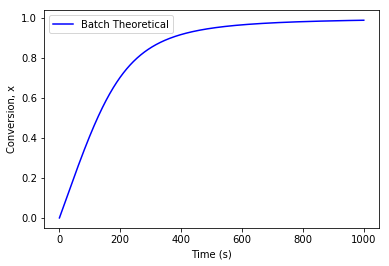

In [53]:
k = 0.15
n = 0.5
m = 1.5

Ca0 = 0.04
Cb0 = 0.02

def batch(x, t):

    dxdt = k*((Ca0**(1-x))**n)*((Cb0**(m-1))*((1-x)**m))
    
    return dxdt

tspan = np.linspace(0, 1000, 1000)
answer = odeint(batch, 0, tspan)

plt.figure(2)
#plt.plot(times, x, 'r-', label='Batch Experimental')
plt.plot(tspan, answer, 'b-', label='Batch Theoretical')
plt.legend(loc='best')
plt.ylabel('Conversion, x')
plt.xlabel('Time (s)')
plt.show()

### PFR

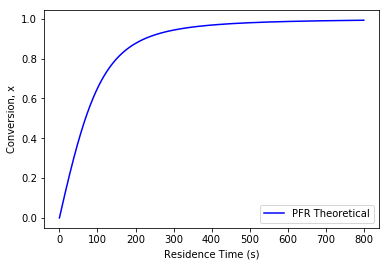

In [56]:
k = 0.15
n = 0.5
m = 1.5

Ca0 = 0.08
Cb0 = 0.04

V = 300
Q1 = 24
Q2 = 40
τ1 = (V/Q1)*60
τ2 = (V/Q2)*60

def PFR(x,τspan):
    
    funcp = k*((Ca0**(1-x))**n)*((Cb0**(m-1))*((1-x)**m))
    
    return funcp

τspan = np.linspace(0, 800, 1000) 
ans = odeint(PFR, 0, τspan)
#exp_x = []
#exp_τ = []

plt.figure(3)
#plt.plot(exp_tau, exp_x, 'o', label='PFR Experimental')
plt.plot(τspan, ans, 'b-', label='PFR Theoretical')
plt.legend(loc='best')
plt.ylabel('Conversion, x')
plt.xlabel('Residence Time (s)')
#plt.axis([200, 800, 0.8, 1.0])
plt.show()


### CSTR

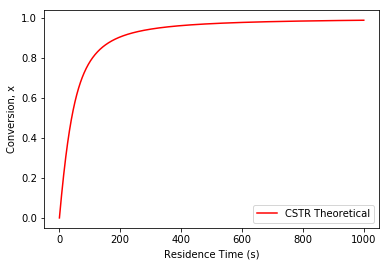

In [50]:
V = 150  
Q1 = 30 
Q2 = 50  

τ1 = (V/Q1)*60  
τ2 = (V/Q2)*60  


k = 0.15
n = 0.5
m = 1.5

Cao = 0.08 #mol/L
Cbo = 0.04 #mol/L

def CSTR1(x1):
    
    func1 = x1 - k*((Ca0**(1-x1))**n)*((Cb0**(m-1))*((1-x1)**m))*τ
    
    return func1

def CSTR2(x2):
    
    func2 = x2 - k*((Ca0**(1-x2))**n)*((Cb0**(m-1))*((1-x2)**m))*τ
    
    return func2

τspan = np.linspace(0, 1000, 1000)
x_list = []

for i,τ in enumerate(τspan):
    
    x_1 = fsolve(CSTR1, 0.5)
    x_2 = fsolve(CSTR2, 0.8)
    
    x_ans = 1 - (1-x_1)*(1-x_2)
    x_list.append(x_ans)

plt.figure(4)
plt.plot(τspan, x_list, 'r-', label='CSTR Theoretical')
plt.legend(loc='best')
plt.ylabel('Conversion, x')
plt.xlabel('Residence Time (s)')
plt.show()